In [1]:
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
import paddle

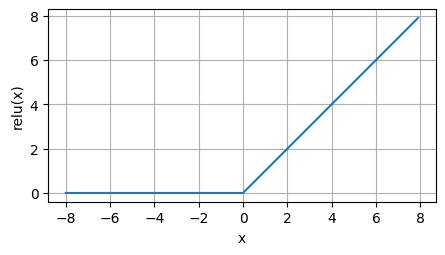

In [3]:
from utils import plot
x = paddle.arange(-8.0, 8.0, 0.1, dtype='float32')
x.stop_gradient = False
y = paddle.nn.functional.relu(x)
plot(x.detach().numpy(), y.detach().numpy(), 'x', 'relu(x)', figsize=(5, 2.5))

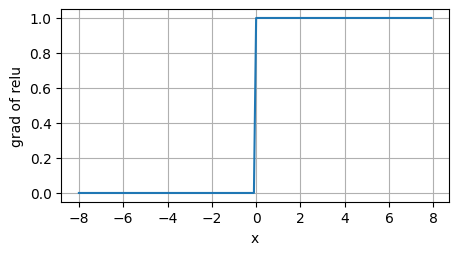

In [4]:
y.backward(paddle.ones_like(x), retain_graph=True)
plot(x.detach().numpy(), x.grad.numpy(), 'x', 'grad of relu', figsize=(5, 2.5))

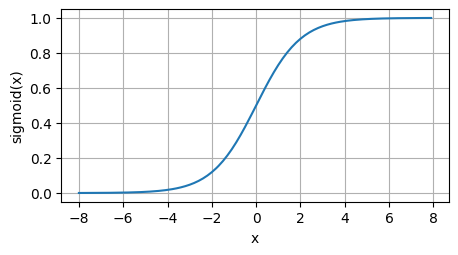

In [5]:
y = paddle.nn.functional.sigmoid(x)
plot(x.detach().numpy(), y.detach().numpy(), 'x', 'sigmoid(x)', figsize=(5, 2.5))

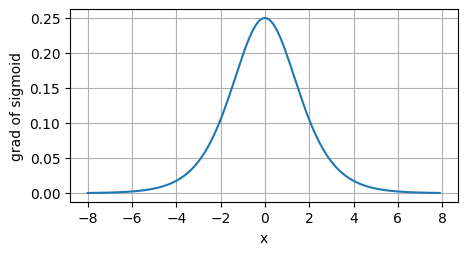

In [8]:
# 清除以前的梯度。
x.clear_gradient()
y.backward(paddle.ones_like(x), retain_graph=True)
plot(x.detach().numpy(), x.grad.numpy(), 'x', 'grad of sigmoid', figsize=(5, 2.5))

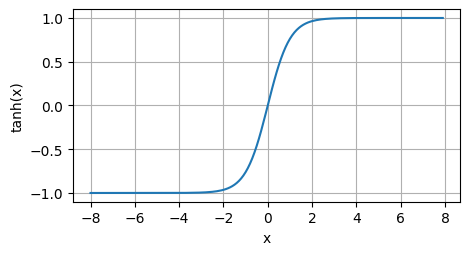

In [9]:
y = paddle.tanh(x)
plot(x.detach().numpy(), y.detach().numpy(), 'x', 'tanh(x)', figsize=(5, 2.5))

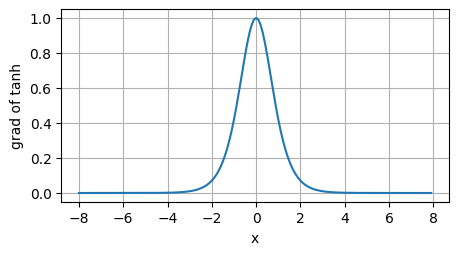

In [10]:
x.clear_grad()
y.backward(paddle.ones_like(x), retain_graph=True)
plot(x.detach().numpy(), x.grad.numpy(), 'x', 'grad of tanh', figsize=(5, 2.5))

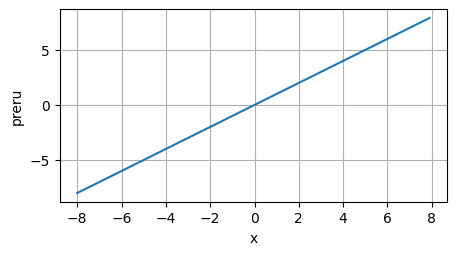

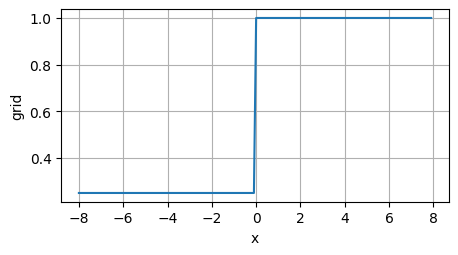

In [14]:
# 练习1
a_shared = paddle.create_parameter(shape=[1], dtype='float32',
                                  default_initializer=paddle.nn.initializer.Constant(value=0.25))
y = paddle.nn.functional.prelu(x,a_shared)
plot(x.detach().numpy(), x.detach().numpy(), 'x', 'preru', figsize=(5, 2.5))

x.clear_grad()
y.backward(paddle.ones_like(x), retain_graph=True)
plot(x.detach().numpy(), x.grad.numpy(), 'x', 'grid', figsize=(5, 2.5))